In [18]:
# Install used packages if needed
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

In [19]:
import time
start_time = time.time()

In [ ]:
import os
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

In [21]:
resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_path = Path.cwd()
cell_types = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic", "im_Parabasal", "im_Superficial-Intermediate"]

features = []
labels = []

In [23]:
for cell_type in cell_types:
    folder_path = os.path.join(base_path, cell_type, "CROPPED")
    
    for img_name in os.listdir(folder_path):
        if img_name.endswith(".bmp"):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))

            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            features_rn = resnet.predict(img_array).flatten()

            features.append(features_rn)
            labels.append(cell_type)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1

In [24]:
features = np.array(features)
labels = np.array(labels)

In [25]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=None)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SGDClassifier(loss="hinge", max_iter=1, warm_start=True)
epochs = 100

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

In [27]:
%%capture
for epoch in range(1, epochs+1):
    svm.fit(X_train, y_train)
    
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_loss = np.mean(y_train_pred != y_train)
    test_loss = np.mean(y_test_pred != y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

In [28]:
correct_predictions = np.sum(y_test_pred == y_test)

accuracy = correct_predictions / len(y_test)
loss = np.mean(y_test_pred != y_test)

In [29]:
precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

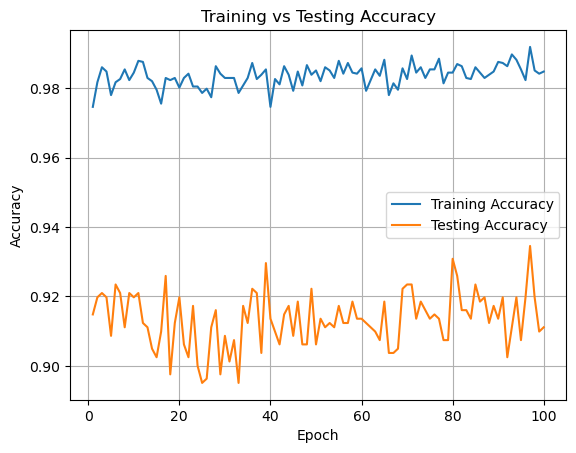

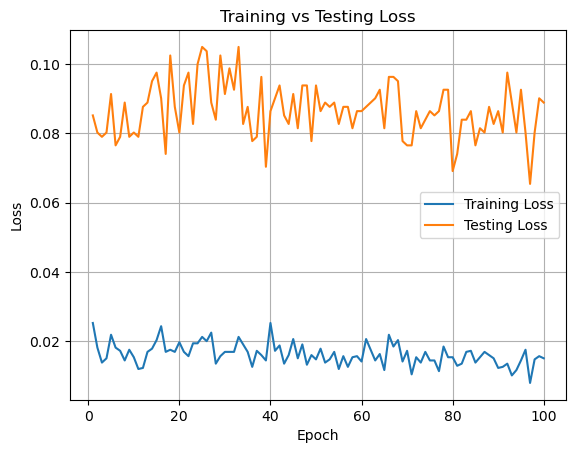

In [30]:
plt.plot(range(1, epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, epochs+1), test_accuracies, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(range(1, epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, epochs+1), test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid()
plt.show()

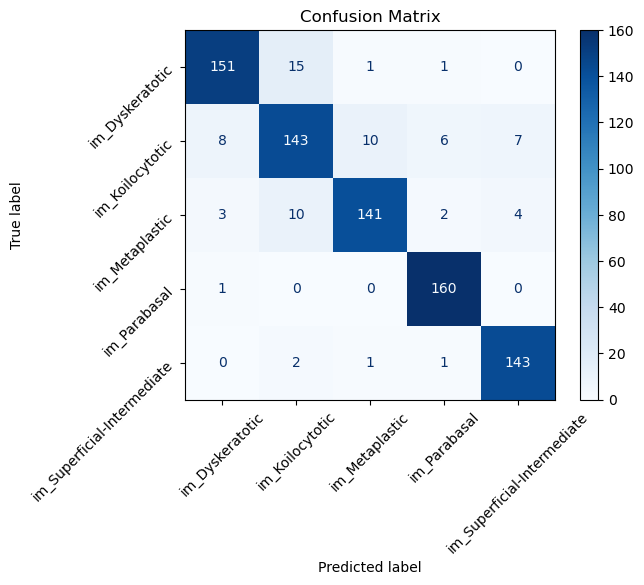

In [31]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()

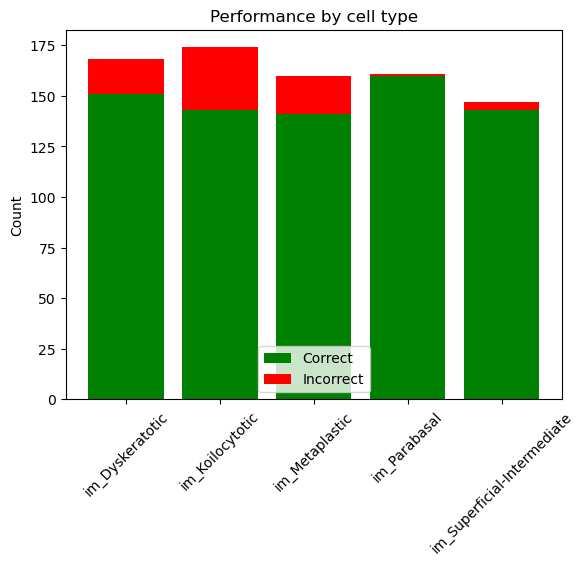

In [32]:
correct_per_class = np.zeros(len(cell_types))
incorrect_per_class = np.zeros(len(cell_types))

for i in range(len(cell_types)):
    correct_per_class[i] = np.sum((y_test == i) & (y_test_pred == i))
    incorrect_per_class[i] = np.sum((y_test == i) & (y_test_pred != i))

x = np.arange(len(cell_types))
plt.bar(x, correct_per_class, color="green", label="Correct")
plt.bar(x, incorrect_per_class, bottom=correct_per_class, color="red", label="Incorrect")
plt.xticks(x, cell_types, rotation=45)
plt.ylabel("Count")
plt.title("Performance by cell type")
plt.legend()
plt.show()

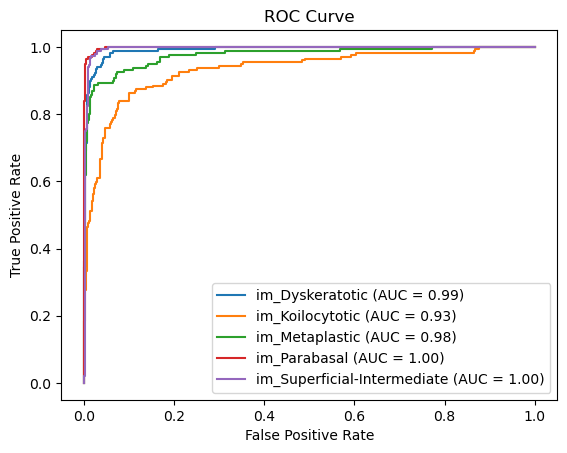

In [33]:
cells = len(label_encoder.classes_)
y_test_bin = label_binarize(y_test, classes=range(cells))
y_score = svm.decision_function(X_test)

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [34]:
end_time = time.time()
total_time = end_time - start_time

In [35]:
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Computation Time: {total_time:.2f}s")

Test Accuracy: 91.11%
Test Loss: 0.0889
Precision: 91.05%
Recall: 91.11%
F1 Score: 91.04%
Computation Time: 999.86s
